<a href="https://colab.research.google.com/github/Jaagat-P/BioFSDatasets_and_code/blob/master/BIOGRIDNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import os
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 1.13.1+cu116


In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
!pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
!pip install ogb  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 KB 6.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.9/704.9 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.0/203.0 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 KB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 7.4 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=d428e1dceb11d9f815c97e85042ec83b40ef70e6a61b87173a2ef9df603b6c63
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils


In [ ]:
# Imports
import torch
import torch_geometric
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.loader import DataLoader
from torch_geometric.nn import SAGEConv
from torch_geometric.utils import negative_sampling
from tqdm import trange
from ogb.linkproppred import PygLinkPropPredDataset, Evaluator

In [ ]:
import pandas as pd
import numpy as np 

df = pd.read_csv("/content/BIOGRID-GENE-108446-4.4.217.tab3.txt", sep="\t", header=None)  

df.head()

tabcol = []
for col in df.iloc[0]:
    tabcol.append(col)    
print(tabcol)

print(tabcol)

for column in df:

    if "-" in df[column].values:
        df = df.drop(column, axis=1)


df.head(10)

['#BioGRID Interaction ID', 'Entrez Gene Interactor A', 'Entrez Gene Interactor B', 'BioGRID ID Interactor A', 'BioGRID ID Interactor B', 'Systematic Name Interactor A', 'Systematic Name Interactor B', 'Official Symbol Interactor A', 'Official Symbol Interactor B', 'Synonyms Interactor A', 'Synonyms Interactor B', 'Experimental System', 'Experimental System Type', 'Author', 'Publication Source', 'Organism ID Interactor A', 'Organism ID Interactor B', 'Throughput', 'Score', 'Modification', 'Qualifications', 'Tags', 'Source Database', 'SWISS-PROT Accessions Interactor A', 'TREMBL Accessions Interactor A', 'REFSEQ Accessions Interactor A', 'SWISS-PROT Accessions Interactor B', 'TREMBL Accessions Interactor B', 'REFSEQ Accessions Interactor B', 'Ontology Term IDs', 'Ontology Term Names', 'Ontology Term Categories', 'Ontology Term Qualifier IDs', 'Ontology Term Qualifier Names', 'Ontology Term Types', 'Organism Name Interactor A', 'Organism Name Interactor B']
['#BioGRID Interaction ID', 'E

,0,1,2,3,4,7,8,11,12,13,14,15,16,17,22,35,36
0,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Experimental System,Experimental System Type,Author,Publication Source,Organism ID Interactor A,Organism ID Interactor B,Throughput,Source Database,Organism Name Interactor A,Organism Name Interactor B
1,11367,7409,2146,113252,108446,VAV1,EZH2,Two-hybrid,physical,Hobert O (1996),PUBMED:8649418,9606,9606,Low Throughput,BIOGRID,Homo sapiens,Homo sapiens
2,22627,2146,8726,108446,114265,EZH2,EED,Two-hybrid,physical,van Lohuizen M (1998),PUBMED:9584197,9606,9606,Low Throughput,BIOGRID,Homo sapiens,Homo sapiens
3,120347,2146,11007,108446,116198,EZH2,CCDC85B,Two-hybrid,physical,Rual JF (2005),PUBMED:16189514,9606,9606,High Throughput,BIOGRID,Homo sapiens,Homo sapiens
4,263879,7409,2146,113252,108446,VAV1,EZH2,Reconstituted Complex,physical,Hobert O (1996),PUBMED:8649418,9606,9606,Low Throughput,BIOGRID,Homo sapiens,Homo sapiens
5,263880,2146,7409,108446,113252,EZH2,VAV1,Affinity Capture-Western,physical,Hobert O (1996),PUBMED:8649418,9606,9606,Low Throughput,BIOGRID,Homo sapiens,Homo sapiens
6,263881,2146,546,108446,107028,EZH2,ATRX,Two-hybrid,physical,Cardoso C (1998),PUBMED:9499421,9606,9606,Low Throughput,BIOGRID,Homo sapiens,Homo sapiens
7,263882,546,2146,107028,108446,ATRX,EZH2,Two-hybrid,physical,Cardoso C (1998),PUBMED:9499421,9606,9606,Low Throughput,BIOGRID,Homo sapiens,Homo sapiens
8,263883,546,2146,107028,108446,ATRX,EZH2,Reconstituted Complex,physical,Cardoso C (1998),PUBMED:9499421,9606,9606,Low Throughput,BIOGRID,Homo sapiens,Homo sapiens
9,263884,2146,546,108446,107028,EZH2,ATRX,Reconstituted Complex,physical,Cardoso C (1998),PUBMED:9499421,9606,9606,Low Throughput,BIOGRID,Homo sapiens,Homo sapiens


In [ ]:
df.drop(index=df.index[0], axis=0, inplace=True)


In [ ]:
agene = list(df[1])
bgene = list(df[2])
expsys = list(df[11])
tput = list(df[17])

df1 = pd.DataFrame(
    {'Gene A': agene, 'Gene B': bgene, "Experimental System": expsys, "Throughput": tput}
)

df1.head(10)

,Gene A,Gene B,Experimental System,Throughput
0,7409,2146,Two-hybrid,Low Throughput
1,2146,8726,Two-hybrid,Low Throughput
2,2146,11007,Two-hybrid,High Throughput
3,7409,2146,Reconstituted Complex,Low Throughput
4,2146,7409,Affinity Capture-Western,Low Throughput
5,2146,546,Two-hybrid,Low Throughput
6,546,2146,Two-hybrid,Low Throughput
7,546,2146,Reconstituted Complex,Low Throughput
8,2146,546,Reconstituted Complex,Low Throughput
9,8726,2146,Two-hybrid,Low Throughput


In [ ]:
from sklearn.preprocessing import OneHotEncoder
df1.dtypes
df1['Experimental System'].unique()
# set up adj list as 

array(['Two-hybrid', 'Reconstituted Complex', 'Affinity Capture-Western',
       'Co-fractionation', 'Co-purification', 'Affinity Capture-MS',
       'Biochemical Activity', 'Co-localization', 'Affinity Capture-RNA',
       'Protein-RNA', 'Affinity Capture-Luminescence', 'Negative Genetic',
       'Positive Genetic', 'Co-crystal Structure', 'Proximity Label-MS'],
      dtype=object)

In [ ]:
df1['Throughput'].unique()

array(['Low Throughput', 'High Throughput'], dtype=object)

In [ ]:
df1["Experimental System"].value_counts()

#Could potentially remove Experimental System, Affinity Capture-Luminescence, Co-crystal structure, etc...? since they all exist once?

Affinity Capture-MS              797
Affinity Capture-Western         324
Reconstituted Complex             51
Two-hybrid                        50
Biochemical Activity              30
Negative Genetic                  22
Positive Genetic                  22
Co-localization                   17
Affinity Capture-RNA              13
Co-fractionation                  11
Protein-RNA                       11
Co-purification                    5
Proximity Label-MS                 2
Affinity Capture-Luminescence      1
Co-crystal Structure               1
Name: Experimental System, dtype: int64

In [ ]:
df1["Throughput"].value_counts()

#Could potentially remove row with merely "Throughput" as it appears only once?

High Throughput    856
Low Throughput     501
Name: Throughput, dtype: int64

In [ ]:
#one hot encode data

dfhot = pd.get_dummies(df1, columns = ["Experimental System", "Throughput"])

dfhot.head(10)


,Gene A,Gene B,Experimental System_Affinity Capture-Luminescence,Experimental System_Affinity Capture-MS,Experimental System_Affinity Capture-RNA,Experimental System_Affinity Capture-Western,Experimental System_Biochemical Activity,Experimental System_Co-crystal Structure,Experimental System_Co-fractionation,Experimental System_Co-localization,Experimental System_Co-purification,Experimental System_Negative Genetic,Experimental System_Positive Genetic,Experimental System_Protein-RNA,Experimental System_Proximity Label-MS,Experimental System_Reconstituted Complex,Experimental System_Two-hybrid,Throughput_High Throughput,Throughput_Low Throughput
0,7409,2146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2146,8726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,2146,11007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7409,2146,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,2146,7409,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,2146,546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
6,546,2146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
7,546,2146,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8,2146,546,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9,8726,2146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
dfhot.columns

Index(['Gene A', 'Gene B', 'Experimental System_Affinity Capture-Luminescence',
       'Experimental System_Affinity Capture-MS',
       'Experimental System_Affinity Capture-RNA',
       'Experimental System_Affinity Capture-Western',
       'Experimental System_Biochemical Activity',
       'Experimental System_Co-crystal Structure',
       'Experimental System_Co-fractionation',
       'Experimental System_Co-localization',
       'Experimental System_Co-purification',
       'Experimental System_Negative Genetic',
       'Experimental System_Positive Genetic',
       'Experimental System_Protein-RNA',
       'Experimental System_Proximity Label-MS',
       'Experimental System_Reconstituted Complex',
       'Experimental System_Two-hybrid', 'Throughput_High Throughput',
       'Throughput_Low Throughput'],
      dtype='object')

In [ ]:
#Rename columns for legibility 

dfhot.rename(columns = {'Experimental System_Affinity Capture-Luminescence':'Affinity Capture-Luminescence', 'Experimental System_Affinity Capture-MS':'Affinity Capture-MS', 'Experimental System_Affinity Capture-RNA':'Affinity Capture-RNA', 'Experimental System_Affinity Capture-Western':'Affinity Capture-Western', 'Experimental System_Biochemical Activity':'Biochemical Activity','Experimental System_Co-crystal Structure':'Co-crystal Structure', 'Experimental System_Co-fractionation':'Co-fractionation', 'Experimental System_Co-localization':'Co-localization', 'Experimental System_Co-purification':'Co-purification', 'Experimental System_Experimental System':'Experimental System', 'Experimental System_Negative Genetic': 'Negative Genetic', 'Experimental System_Positive Genetic':'Positive Genetic', 'Experimental System_Protein-RNA':'Protein-RNA', 'Experimental System_Proximity Label-MS': 'Proximity Label-MS', 'Experimental System_Reconstituted Complex':'Reconstituted Complex', 'Experimental System_Two-hybrid': 'Two-hybrid', 'Throughput_High Throughput':'High Throughput', 'Throughput_Low Throughput':'Low Throughput', 'Throughput_Throughput':'Throughput'}, inplace = True)


In [ ]:
dfhot.head()

#dfhot["Affinity Capture-Luminescence"].value_counts()

,Gene A,Gene B,Affinity Capture-Luminescence,Affinity Capture-MS,Affinity Capture-RNA,Affinity Capture-Western,Biochemical Activity,Co-crystal Structure,Co-fractionation,Co-localization,Co-purification,Negative Genetic,Positive Genetic,Protein-RNA,Proximity Label-MS,Reconstituted Complex,Two-hybrid,High Throughput,Low Throughput
0,7409,2146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2146,8726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,2146,11007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7409,2146,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,2146,7409,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfhot.columns

Index(['Gene A', 'Gene B', 'Affinity Capture-Luminescence',
       'Affinity Capture-MS', 'Affinity Capture-RNA',
       'Affinity Capture-Western', 'Biochemical Activity',
       'Co-crystal Structure', 'Co-fractionation', 'Co-localization',
       'Co-purification', 'Negative Genetic', 'Positive Genetic',
       'Protein-RNA', 'Proximity Label-MS', 'Reconstituted Complex',
       'Two-hybrid', 'High Throughput', 'Low Throughput'],
      dtype='object')

In [ ]:
print(dfhot['Gene A'][1])

2146


In [ ]:
dfhot.columns

Index(['Gene A', 'Gene B', 'Affinity Capture-Luminescence',
       'Affinity Capture-MS', 'Affinity Capture-RNA',
       'Affinity Capture-Western', 'Biochemical Activity',
       'Co-crystal Structure', 'Co-fractionation', 'Co-localization',
       'Co-purification', 'Negative Genetic', 'Positive Genetic',
       'Protein-RNA', 'Proximity Label-MS', 'Reconstituted Complex',
       'Two-hybrid', 'High Throughput', 'Low Throughput'],
      dtype='object')

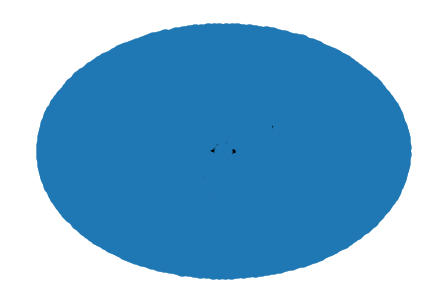

In [ ]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Create a list of genes
genes = list(set(dfhot['Gene A'].tolist() + dfhot['Gene B'].tolist()))

# Add nodes to the graph
for gene in genes:
    G.add_node(gene)

# Add edges to the graph and aggregate the binomial values
for index, row in dfhot.iterrows():
    gene_a = row['Gene A']
    gene_b = row['Gene B']
    binomial_values = row.iloc[2:]
    if G.has_edge(gene_a, gene_b):
        edge_data = G[gene_a][gene_b]
        edge_data['binomial_values'] += binomial_values
    else:
        G.add_edge(gene_a, gene_b, binomial_values=binomial_values)

# Aggregate the binomial values for each node
for gene in genes:
    node_data = G.nodes[gene]
    node_binomial_values = sum([G[gene][neighbor]['binomial_values'] for neighbor in G[gene]])
    node_data['binomial_values'] = node_binomial_values

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)



{'7409': Text(1.0, -0.5733242237522858, '7409'),
 '11007': Text(-0.9963184414873324, 0.5796682866726441, '11007'),
 '2146': Text(-0.0036815585126676875, -0.006344062920358302, '2146')}

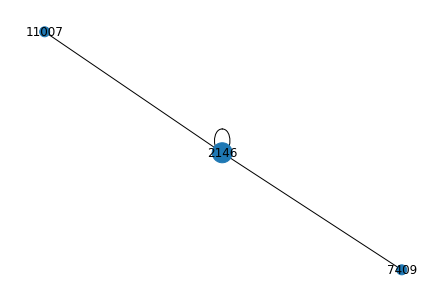

In [ ]:
# Define the list of nodes that you want to include in your subset
node_subset = ['2146', '2146', '7409', '11007']

# Create a subgraph from the node subset
subgraph = nx.subgraph(G, node_subset)

# Visualize the subgraph

pos = nx.kamada_kawai_layout(subgraph)

# Set node size based on degree
node_size = [d * 100 for n, d in subgraph.degree()]

nx.draw(subgraph, pos, node_size=node_size)
labels = {node: node for node in subgraph.nodes()}
nx.draw_networkx_labels(subgraph, pos, labels)


In [ ]:
print(G)

Graph with 808 nodes and 808 edges


In [ ]:
#Number of columns in the one hot encoded data or essentially, node attributes

num_features = dfhot.shape[1]

print(num_features)

19


In [ ]:
#Convert dfhot into a matrix of continous values for node_features

import pandas as pd
import numpy as np



# Convert the one-hot encoded data into a matrix of continuous values
node_features = np.array(dfhot.iloc[:, 1:])


In [ ]:
print(node_features)

[['2146' 0 0 ... 1 0 1]
 ['8726' 0 0 ... 1 0 1]
 ['11007' 0 0 ... 1 1 0]
 ...
 ['121536' 0 1 ... 0 0 1]
 ['8726' 0 1 ... 0 0 1]
 ['2145' 0 1 ... 0 0 1]]


In [ ]:
import networkx as nx


# Get the node indices
node_indices = {node: i for i, node in enumerate(G.nodes())}

# Create the edge indices
edge_indices = []
for edge in G.edges():
    u, v = edge
    edge_indices.append([node_indices[u], node_indices[v]])

# Convert the edge indices to a matrix
edge_indices = np.array(edge_indices)


In [ ]:
print(edge_indices)

[[  0  14]
 [  1  14]
 [  2  14]
 ...
 [ 14 771]
 [ 14  60]
 [ 14  86]]


In [ ]:
#generate target labels (does a connection exist between node u and node v or not?)
import itertools

# Create a list of all possible edges
all_edges = list(itertools.combinations(G.nodes(), 2))

# Create a list of edges that are present in the graph
existing_edges = list(G.edges())

# Create the target labels
target_labels = [1 if edge in existing_edges else 0 for edge in all_edges]

labels_array = np.array(target_labels)


In [ ]:
print(labels_array)

#study target labels in machine learning

[0 0 0 ... 0 0 0]


In [ ]:
node_features = node_features.astype(np.float32)
edge_indices = edge_indices.astype(np.float32)
labels_array = labels_array.astype(np.float32)

In [ ]:
data = Data(x=torch.tensor(node_features), edge_index=torch.tensor(edge_indices), y=torch.tensor(target_labels))

Notes: A tuple is a collection of ordered, immutable and heterogeneous elements. It can contain elements of different data types. Tuples are written in round brackets, with elements separated by commas. An example of a tuple is (1, "hello", 3.14). Unlike lists, tuples cannot be modified after creation, which makes them more efficient for certain use cases.





In [ ]:
#I now need to train my data to identify links between genes


import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GraphSAGE

# Define the model
class Net(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(Net, self).__init__()
        self.conv1 = GraphSAGE(in_channels, hidden_channels)
        self.conv2 = GraphSAGE(hidden_channels, out_channels)
        
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model
model = Net(node_features.shape[1], 128, 1)

# Define the loss function
criterion = nn.BCEWithLogitsLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/200], Loss: {loss.item()}")


TypeError: ignored